In [1]:
import pandas as pd
import os

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
path = r'C:\Users\mysel\OneDrive\Documents\Kaggle\train.csv'


In [49]:
train = pd.read_csv(os.path.join(path, 'train.csv'))

print(train.head())

print(train.shape)

inputs = train.columns.tolist()
inputs.remove('target')

   id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
0   7       0          2              2          5              1   
1   9       0          1              1          7              0   
2  13       0          5              4          9              1   
3  16       0          0              1          2              0   
4  17       0          0              2          0              1   

   ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ...  \
0              0              0              1              0  ...   
1              0              0              0              1  ...   
2              0              0              0              1  ...   
3              0              1              0              0  ...   
4              0              1              0              0  ...   

   ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  ps_calc_15_bin  \
0           9           1           5           8               0   
1           3           1 

In [50]:
print(train.columns)

Index(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09',
       'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin'],


### Assign Missing Values as NaN

In [51]:
train[train.iloc[:, 3] == -1].head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
847,2210,0,5,-1,0,-1,-1,0,1,0,...,5,2,2,9,0,0,0,0,0,0
11840,29812,0,0,-1,8,0,0,0,0,0,...,6,1,3,9,0,0,1,1,0,0
13670,34370,0,5,-1,0,-1,-1,0,0,1,...,4,0,1,6,0,1,0,0,0,0
13804,34695,0,0,-1,0,-1,-1,1,0,0,...,5,2,1,4,0,1,0,0,1,0
14002,35176,0,0,-1,7,0,6,0,1,0,...,2,2,1,9,0,1,1,0,1,0


In [65]:
train = train.replace(-1, np.NaN)

### Convert Categorical Data type as Object

In [57]:
cat_mask = ['cat' in x for x in train.columns]
print(cat_mask)

[False, False, False, True, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]


In [58]:
train[cat_columns] = train[cat_columns].astype(object)

In [59]:
train[cat_columns].head()

,ps_ind_02_cat,ps_ind_04_cat,ps_ind_05_cat,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat
0,2,1,0,10,1,NaN,0,1,4,1,0,0,1,12
1,1,0,0,11,1,NaN,0,NaN,11,1,1,2,1,19
2,4,1,0,7,1,NaN,0,NaN,14,1,1,2,1,60
3,1,0,0,7,1,0,0,1,11,1,1,3,1,104
4,2,1,0,11,1,NaN,0,NaN,14,1,1,2,1,82


In [60]:
cat_columns = list(train.columns[cat_mask])
print(cat_columns)
train[cat_columns].head()

['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat']


,ps_ind_02_cat,ps_ind_04_cat,ps_ind_05_cat,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat
0,2,1,0,10,1,NaN,0,1,4,1,0,0,1,12
1,1,0,0,11,1,NaN,0,NaN,11,1,1,2,1,19
2,4,1,0,7,1,NaN,0,NaN,14,1,1,2,1,60
3,1,0,0,7,1,0,0,1,11,1,1,3,1,104
4,2,1,0,11,1,NaN,0,NaN,14,1,1,2,1,82


In [61]:
train['id'] = train['id'].astype(object)

In [62]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
id                595212 non-null object
target            595212 non-null int64
ps_ind_01         595212 non-null int64
ps_ind_02_cat     594996 non-null object
ps_ind_03         595212 non-null int64
ps_ind_04_cat     595129 non-null object
ps_ind_05_cat     589403 non-null object
ps_ind_06_bin     595212 non-null int64
ps_ind_07_bin     595212 non-null int64
ps_ind_08_bin     595212 non-null int64
ps_ind_09_bin     595212 non-null int64
ps_ind_10_bin     595212 non-null int64
ps_ind_11_bin     595212 non-null int64
ps_ind_12_bin     595212 non-null int64
ps_ind_13_bin     595212 non-null int64
ps_ind_14         595212 non-null int64
ps_ind_15         595212 non-null int64
ps_ind_16_bin     595212 non-null int64
ps_ind_17_bin     595212 non-null int64
ps_ind_18_bin     595212 non-null int64
ps_reg_01         595212 non-null float64
ps_reg_02         595212 non-null float64
p

In [32]:
train[cat_columns[0]].value_counts()

 1    431859
 2    123573
 3     28186
 4     11378
-1       216
Name: ps_ind_02_cat, dtype: int64

In [76]:
bin_mask = ['bin' in x for x in train.columns]
bin_columns = list(train.columns[bin_mask])
print(bin_colums + cat_columns)

['ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin', 'ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat']


In [77]:
numeric_mask = [(x not in cat_columns + bin_colums) and (x not in ['id', 'target']) for x in train.columns] 
numeric_cols = list(train.columns[numeric_mask])
print(numeric_cols)

['ps_ind_01', 'ps_ind_03', 'ps_ind_14', 'ps_ind_15', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14']


In [78]:
train[numeric_cols].describe()

,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_11,ps_car_12,ps_car_13,...,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,487440.000000,595207.000000,595211.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,1.900378,4.423318,0.012451,7.299922,0.610991,0.439184,0.894047,2.346100,0.379947,0.813265,...,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026
std,1.983789,2.699902,0.127545,3.546042,0.287643,0.404264,0.345413,0.832495,0.058300,0.224588,...,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.061237,0.000000,0.100000,0.250619,...,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,5.000000,0.400000,0.200000,0.633443,2.000000,0.316228,0.670867,...,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000
50%,1.000000,4.000000,0.000000,7.000000,0.700000,0.300000,0.801561,3.000000,0.374166,0.765811,...,2.000000,8.000000,3.000000,9.000000,2.000000,8.000000,5.000000,1.000000,3.000000,7.000000
75%,3.000000,6.000000,0.000000,10.000000,0.900000,0.600000,1.083974,3.000000,0.400000,0.906190,...,3.000000,9.000000,4.000000,10.000000,3.000000,10.000000,7.000000,2.000000,4.000000,9.000000
max,7.000000,11.000000,4.000000,13.000000,0.900000,1.800000,4.037945,3.000000,1.264911,3.720626,...,6.000000,10.000000,9.000000,12.000000,7.000000,25.000000,19.000000,10.000000,13.000000,23.000000


### Data Exploration

In [81]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2.0,5,1.0,0.0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1.0,7,0.0,0.0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4.0,9,1.0,0.0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1.0,2,0.0,0.0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2.0,0,1.0,0.0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [80]:
len(numeric_cols)

26

In [92]:
train['target'].head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [105]:
len(numeric_cols)

26

No handles with labels found to put in legend.


<Figure size 1080x1296 with 0 Axes>

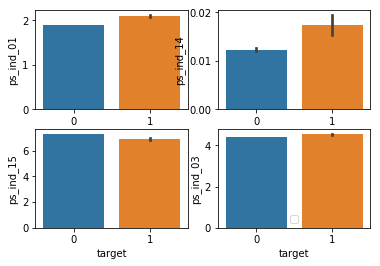

In [109]:
plt.figure(figsize=(15, 18))
fig, ax = plt.subplots(2,2)

for ix, col in enumerate(numeric_cols[:4]):
    ix1 = ix%2
    ix2 = [0,1,1,0][ix]
#     if ix > 1:
#         ix1 = np.abs(ix - 2)
#         ix2 = np.abs(1 - ix1)
    sns.barplot(train['target'], train[col], ax=ax[ix1][ix2])

plt.legend()
plt.show()

### Numeric Cols Exploration

In [90]:
# col = numeric_cols[0]
for col in numeric_cols:
    print('\n' + col + ' column')
    print(train[col].value_counts().shape)
    if train[col].value_counts().shape[0] <10:
        print(train[col].value_counts())
    else:
        print(train[col].head())


ps_ind_01 column
(8,)
0    187594
1    143984
2     82468
5     61464
3     51193
4     33524
6     17682
7     17303
Name: ps_ind_01, dtype: int64

ps_ind_03 column
(12,)
0    5
1    7
2    9
3    2
4    0
Name: ps_ind_03, dtype: int64

ps_ind_14 column
(5,)
0    588832
1      5495
2       744
3       136
4         5
Name: ps_ind_14, dtype: int64

ps_ind_15 column
(14,)
0    11
1     3
2    12
3     8
4     9
Name: ps_ind_15, dtype: int64

ps_reg_01 column
(10,)
0    0.7
1    0.8
2    0.0
3    0.9
4    0.7
Name: ps_reg_01, dtype: float64

ps_reg_02 column
(19,)
0    0.2
1    0.4
2    0.0
3    0.2
4    0.6
Name: ps_reg_02, dtype: float64

ps_reg_03 column
(5012,)
0    0.718070
1    0.766078
2         NaN
3    0.580948
4    0.840759
Name: ps_reg_03, dtype: float64

ps_car_11 column
(4,)
3.0    318919
2.0    189353
1.0     60952
0.0     25983
Name: ps_car_11, dtype: int64

ps_car_12 column
(183,)
0    0.400000
1    0.316228
2    0.316228
3    0.374166
4    0.316070
Name: ps_car_12, dtyp

### Data Splitting

In [111]:
print(train.shape)
print(train.target.value_counts())

(595212, 59)
0    573518
1     21694
Name: target, dtype: int64


In [117]:
input_columns = list(train.columns)
input_columns.remove('target')
np.random.seed(38017)
X_trainval, X_test, y_trainval, y_test  = train_test_split(train[input_columns], train['target'], test_size=0.2)

In [147]:
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.2)
print(y_train.shape, y_val.shape)
print(y_train.value_counts())
print(y_val.value_counts())

(380935,) (95234,)
0    367105
1     13830
Name: target, dtype: int64
0    91727
1     3507
Name: target, dtype: int64


In [153]:
# X_train.loc[y_train == 1, :]

In [160]:
X_train_0, y_train_0 = X_train[y_train == 0], y_train[y_train == 0]
X_train_1, y_train_1 = X_train[y_train == 1], y_train[y_train == 1]

np.random.seed(38017)
X_train_0_us = X_train_0.sample(100000)
X_train_1_os = X_train_1.sample(100000, replace=True)


X_train = pd.concat([train_0_us, train_1_os], axis=0)
y_train = pd.concat([y_train_0[X_train_0_us.index], y_train_1[X_train_1_os.index]])
print(X_train.shape)
print(y_train.shape)
print(y_train.value_counts())

C:\Users\mysel\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\mysel\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


(200000, 58)
(200000,)
1    100000
0    100000
Name: target, dtype: int64


No handles with labels found to put in legend.


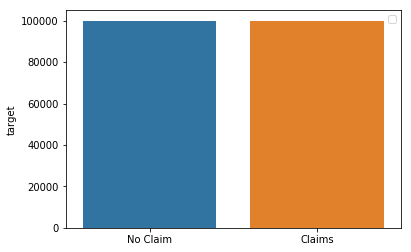

In [164]:
target_cnts = y_train.value_counts()
plt.figure()
sns.barplot(x=['No Claim', 'Claims'], y=target_cnts)
plt.legend()
plt.show()

In [165]:
X_train.head()

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
209690,523832,3,1.0,3,1.0,0.0,0,1,0,0,...,1,4,2,7,0,1,1,1,0,0
551790,1379132,0,1.0,6,1.0,0.0,1,0,0,0,...,9,1,2,8,0,0,1,0,0,0
448734,1121345,4,1.0,2,0.0,0.0,0,1,0,0,...,5,0,3,12,1,1,0,1,0,0
431088,1077268,3,1.0,7,0.0,0.0,1,0,0,0,...,7,1,1,9,1,1,1,1,0,0
194915,487020,7,1.0,6,0.0,6.0,1,0,0,0,...,8,1,1,10,0,1,1,1,0,0


In [312]:
# X_train[numeric_cols].isna().sum() / X_train.shape[0]
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 209690 to 539992
Data columns (total 58 columns):
id                200000 non-null int64
ps_ind_01         200000 non-null int64
ps_ind_02_cat     199801 non-null float64
ps_ind_03         200000 non-null int64
ps_ind_04_cat     199843 non-null float64
ps_ind_05_cat     196840 non-null float64
ps_ind_06_bin     200000 non-null int64
ps_ind_07_bin     200000 non-null int64
ps_ind_08_bin     200000 non-null int64
ps_ind_09_bin     200000 non-null int64
ps_ind_10_bin     200000 non-null int64
ps_ind_11_bin     200000 non-null int64
ps_ind_12_bin     200000 non-null int64
ps_ind_13_bin     200000 non-null int64
ps_ind_14         200000 non-null int64
ps_ind_15         200000 non-null int64
ps_ind_16_bin     200000 non-null int64
ps_ind_17_bin     200000 non-null int64
ps_ind_18_bin     200000 non-null int64
ps_reg_01         200000 non-null float64
ps_reg_02         200000 non-null float64
ps_reg_03         167526 non-null 

In [321]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

si = SimpleImputer(missing_values=np.nan, strategy='median')
steps = [('Imputer', si)
         , ('std_scaler', StandardScaler())
         , ('PCA', PCA(n_components=20)
#          , ('lasso_cv', LassoCV())
         )]

# X_train_i = si.fit_transform(X_train)
# X_train_i[:5]

In [338]:

mypipe = Pipeline(steps)
X_train_trans = mypipe.fit_transform(X_train)
X_test_trans = mypipe.fit_transform(X_test)

lcv.fit(X_train_trans, y_train.reset_index().target.to_numpy())

LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [339]:
print(lcv.score(X_train_trans, y_train.reset_index().target.to_numpy()))
print(lcv.score(X_test_trans, y_test.reset_index().target.to_numpy()))

0.03687514692196836
-6.269160935704374


In [343]:
train_pred = lcv.predict(X_train_trans)
test_pred = lcv.predict(X_test_trans)


In [349]:
from sklearn.metrics import accuracy_score

# print(train_pred[:5])
# print(y_train.head())

# print(test_pred[:5])
# print(y_test.head())

# print('Accuracy of Training Set: {:.2f}'.format(accuracy_score(train_pred, y_train.reset_index().target.to_numpy())))
# print('Accuracy of Test Set: {:.2f}'.format(accuracy_score(test_pred, y_test.reset_index().target.to_numpy())))

In [359]:
np.sum((test_pred - y_test.reset_index().target.to_numpy())**2)/test_pred.shape[0]

0.25631529577272916

In [360]:
np.sum((train_pred - y_train.reset_index().target.to_numpy())**2)/train_pred.shape[0]

0.2407812132695079

In [335]:
y_train.reset_index().target.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [328]:
print(X_train_trans[:5])
print(X_test_trans[:5])

[[ 1.35541483  0.41063826  1.34390102 -1.03217102 -1.4180232   0.08751053
   0.22415825 -1.79612708 -0.51622688  0.34502051  0.43650276 -1.20274775
  -0.52769858 -1.62930691  0.90584436 -1.45471371 -0.12894675  0.52644704
   1.05599096 -0.69198755]
 [-3.53049576 -0.25628081 -0.0123659   1.90252122 -0.01587615 -0.31964766
  -0.22989108 -1.85370779 -0.99695751 -2.352317   -0.19440602 -0.12455592
  -0.86665996  0.11043096  0.20247477  0.86431486 -0.69720312 -0.1702266
  -1.62746279 -0.43563632]
 [ 1.33412651 -0.58049783  0.36491484  1.41018067 -0.48209863 -0.55625246
   0.70059019 -0.82658513  0.76534886  0.48007285 -0.35627235  0.54909877
   1.95811783  0.92654027 -0.82185876  0.0044869   1.42316055  1.56984912
   1.18757243 -1.56668662]
 [ 0.31717828 -0.80746421 -1.43590534  1.01701401  0.71719311 -0.28838209
   1.64212937  3.23654365  1.88197742  0.07591987  0.6878736   0.49967705
   2.27022059  0.79331201  0.15518422  0.21931401 -1.17682825  0.41943886
   0.53855817 -1.06978439]
 [-0.

In [262]:
si.statistics_

array([7.44533467e+05, 1.99432500e+00, 1.36766583e+00, 4.47410000e+00,
       4.27130297e-01, 5.26122739e-01, 3.51650000e-01, 2.95135000e-01,
       1.75220000e-01, 1.77995000e-01, 5.45000000e-04, 1.94000000e-03,
       1.09200000e-02, 8.65000000e-04, 1.42700000e-02, 7.12916500e+00,
       6.26990000e-01, 1.52525000e-01, 1.56405000e-01, 6.26401500e-01,
       4.74602000e-01, 9.24710932e-01, 8.40683284e+00, 8.00509003e-01,
       6.23649382e-01, 8.97660000e-01, 5.27263374e-01, 6.69586500e+00,
       9.35413692e-01, 8.14685000e-01, 1.34666493e+00, 9.91840000e-01,
       6.30097000e+01, 2.34030170e+00, 3.85568525e-01, 8.42102927e-01,
       3.75809026e-01, 3.11249291e+00, 4.52928500e-01, 4.51208500e-01,
       4.50678500e-01, 2.36857500e+00, 1.88563000e+00, 7.68360000e+00,
       3.02031500e+00, 9.21495500e+00, 2.34381000e+00, 8.44798500e+00,
       5.43543500e+00, 1.43679500e+00, 2.87194500e+00, 7.54145500e+00,
       1.21625000e-01, 6.25475000e-01, 5.52330000e-01, 2.86750000e-01,
      

In [253]:
 y_train.reset_index().target.to_frame()['target'].value_counts()

1    100000
0    100000
Name: target, dtype: int64

In [260]:
num_pd = pd.DataFrame(X_train_i, columns=X_train.columns)
num_pd = pd.concat([num_pd, y_train.reset_index().target.to_frame()], axis=1)
# num_pd.head()
# print(y_train.head())
# print(num_pd.head())

In [221]:
print(num_pd.iloc[:, :5].head())
print(y_train.reset_index()['target'].head())
# , hue=y_train.reset_index()['target']

   ps_ind_01  ps_ind_03  ps_ind_14  ps_ind_15  ps_reg_01
0        3.0        3.0        0.0       11.0        0.9
1        0.0        6.0        0.0       11.0        0.5
2        4.0        2.0        0.0        6.0        0.6
3        3.0        7.0        0.0        9.0        0.9
4        7.0        6.0        0.0        7.0        0.7
0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64


<Figure size 432x288 with 0 Axes>

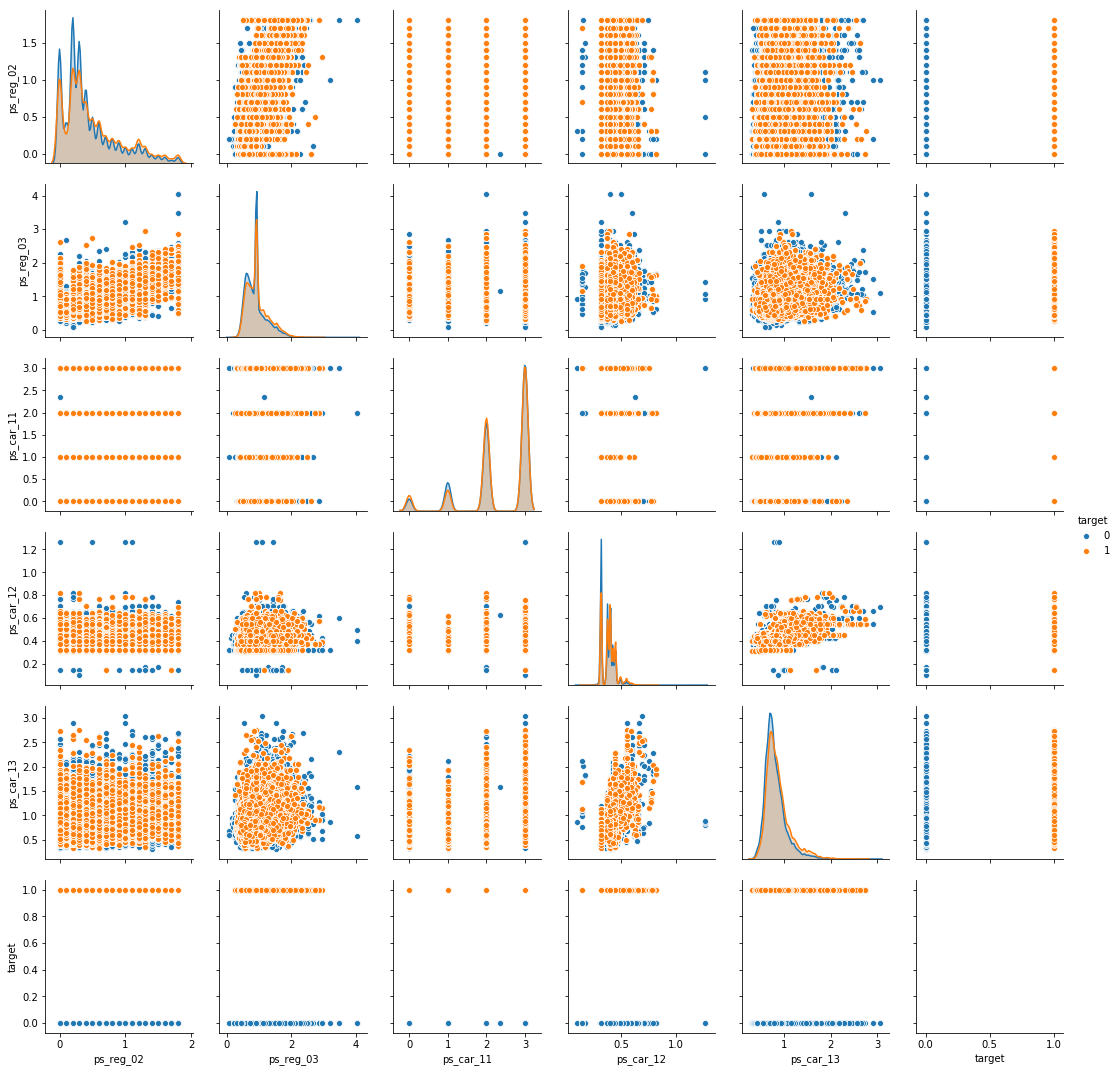

In [261]:
plt.figure()
sns.pairplot(num_pd.loc[:, numeric_cols[5:10]  + ['target']], hue='target')
plt.show()

In [287]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
num_pd[numeric_cols] = std_scaler.fit_transform(num_pd[numeric_cols])

In [295]:
print(si.statistics_)
print(std_scaler.mean_)

[7.44533467e+05 1.99432500e+00 1.36766583e+00 4.47410000e+00
 4.27130297e-01 5.26122739e-01 3.51650000e-01 2.95135000e-01
 1.75220000e-01 1.77995000e-01 5.45000000e-04 1.94000000e-03
 1.09200000e-02 8.65000000e-04 1.42700000e-02 7.12916500e+00
 6.26990000e-01 1.52525000e-01 1.56405000e-01 6.26401500e-01
 4.74602000e-01 9.24710932e-01 8.40683284e+00 8.00509003e-01
 6.23649382e-01 8.97660000e-01 5.27263374e-01 6.69586500e+00
 9.35413692e-01 8.14685000e-01 1.34666493e+00 9.91840000e-01
 6.30097000e+01 2.34030170e+00 3.85568525e-01 8.42102927e-01
 3.75809026e-01 3.11249291e+00 4.52928500e-01 4.51208500e-01
 4.50678500e-01 2.36857500e+00 1.88563000e+00 7.68360000e+00
 3.02031500e+00 9.21495500e+00 2.34381000e+00 8.44798500e+00
 5.43543500e+00 1.43679500e+00 2.87194500e+00 7.54145500e+00
 1.21625000e-01 6.25475000e-01 5.52330000e-01 2.86750000e-01
 3.49250000e-01 1.51680000e-01]
[1.994325   4.4741     0.01427    7.129165   0.6264015  0.474602
 0.92471093 2.3403017  0.38556852 0.84210293 0.37

In [292]:
num_pd.shape

(200000, 59)

In [296]:


pca = PCA()
X_train_pca = pca.fit_transform(num_pd[numeric_cols])

In [297]:
X_train_pca.shape

(200000, 26)

In [298]:
comp_variance = pca.explained_variance_ratio_
print(pd.DataFrame(list(zip(list(range(len(comp_variance))), comp_variance.cumsum()))))

     0         1
0    0  0.099566
1    1  0.166348
2    2  0.218977
3    3  0.264087
4    4  0.304209
5    5  0.343943
6    6  0.383272
7    7  0.422379
8    8  0.461406
9    9  0.500185
10  10  0.538887
11  11  0.577427
12  12  0.615865
13  13  0.654186
14  14  0.692160
15  15  0.729928
16  16  0.767602
17  17  0.805133
18  18  0.842387
19  19  0.878495
20  20  0.911122
21  21  0.940769
22  22  0.968777
23  23  0.985122
24  24  0.993615
25  25  1.000000


In [300]:
t = pd.concat([pd.DataFrame(X_train_pca[:, :5], columns=['PCA_' + str(i) for i in range(5)]),\
               y_train.reset_index().target.to_frame()], axis=1)
print(t.head())

      PCA_0     PCA_1     PCA_2     PCA_3     PCA_4  target
0  0.552748  1.852055 -0.032645 -0.473715 -0.939641       0
1 -2.802619  0.942288 -2.078565  1.525138 -1.042759       0
2  0.503790  0.655482 -0.606185  1.993761 -0.494214       0
3  0.764426 -0.424529 -1.209341  0.669803  1.140449       0
4  0.940133 -0.239998 -1.371776 -0.084959 -0.135881       0


C:\Users\mysel\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\mysel\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


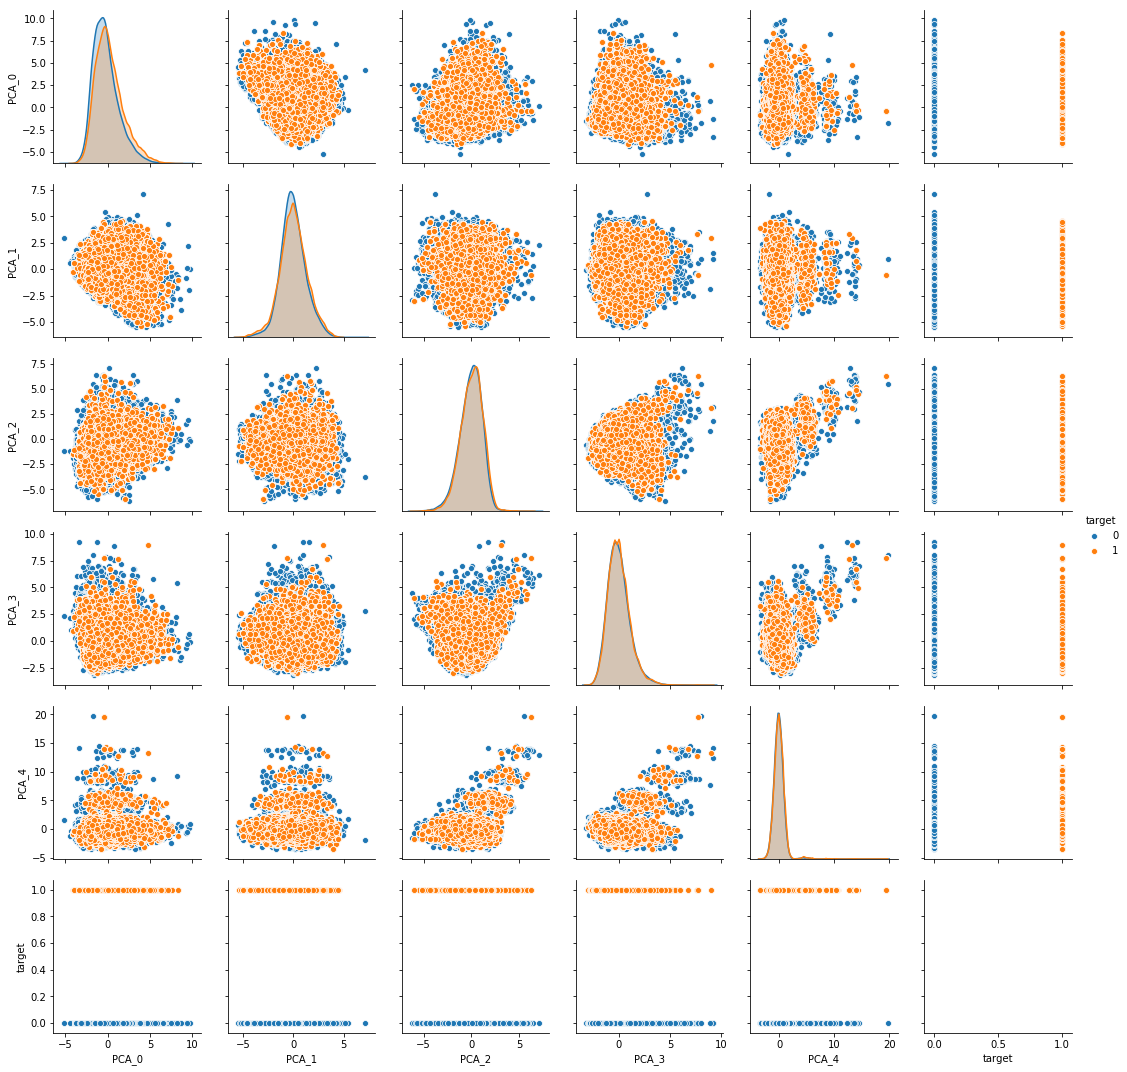

In [301]:
sns.pairplot(t, hue='target')
plt.show()

In [280]:
pd.DataFrame(X_train_pca[:,1], columns=['PCA_1']).head()

,PCA_1
0,-29.028992
1,31.182786
2,58.063345
3,49.069004
4,31.979741


In [282]:
y_train.reset_index().target.to_frame().head()

,target
0,0
1,0
2,0
3,0
4,0


In [265]:
pd.DataFrame(pd.concat([X_train_pca[:, 1],y_train.reset_index().target], axis=0))

array([-29.02899245,  31.18278603,  58.06334486, ..., -20.88192149,
        53.01383728, -15.84598849])

In [169]:
X_train.columns

Index(['id', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat',
       'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
       'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin',
       'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03',
       'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat',
       'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
       'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11',
       'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01',
       'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06',
       'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11',
       'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin',
       'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',
       'ps_calc_20_bin'],
      dtyp

In [303]:
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestClassifier


In [306]:
y_train.reset_index().target.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [308]:
lcv = LassoCV(cv=5)
lcv.fit(t, y_train.reset_index().target)
lcv.score(t, y_train.reset_index().target)

0.999999

In [310]:
lcv.coef_

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.999])

In [311]:
y_train.shape

(200000,)